In [2]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.6/33.6 MB 37.1 MB/s eta 0:00:00


In [8]:
import cv2
from google.colab.patches import cv2_imshow
import mediapipe as mp
import time

In [4]:
mpPose = mp.solutions.pose
pose = mpPose.Pose()
mpDraw = mp.solutions.drawing_utils

In [19]:
cap = cv2.VideoCapture('dance.mp4')
pTime = 0

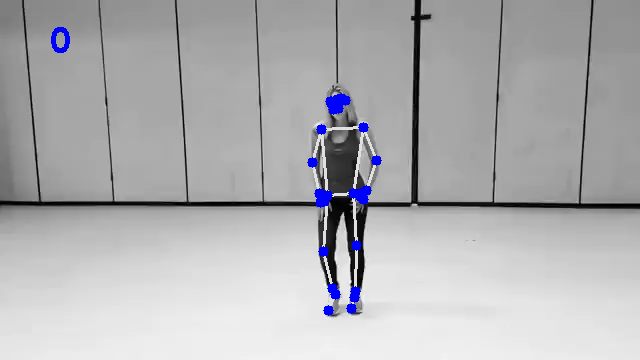

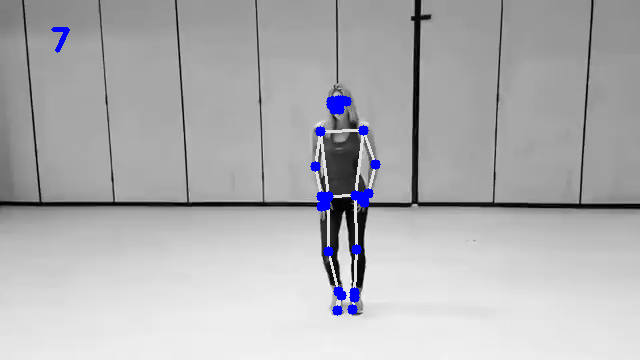

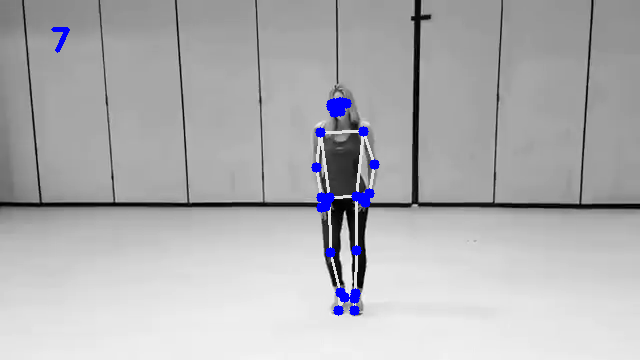

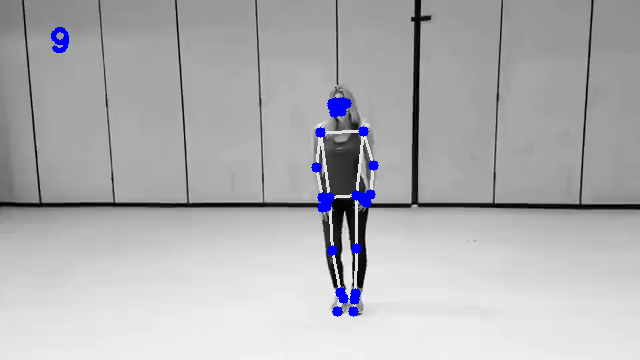

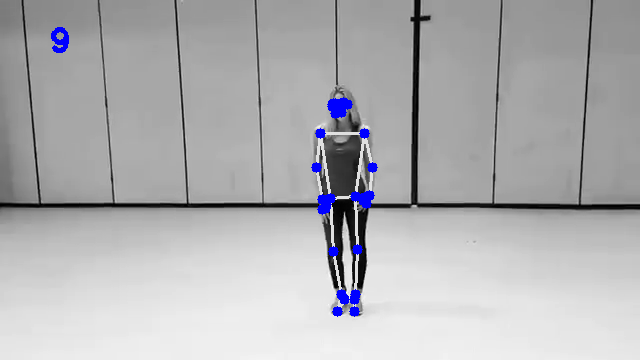

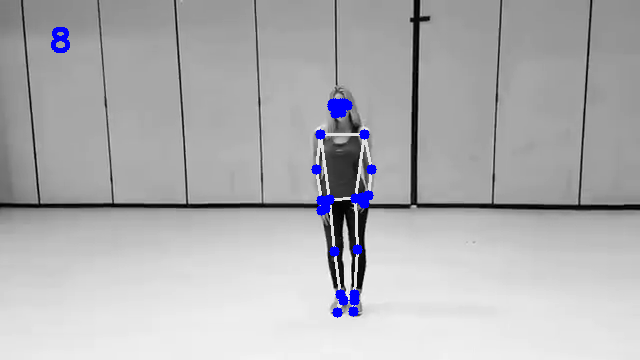

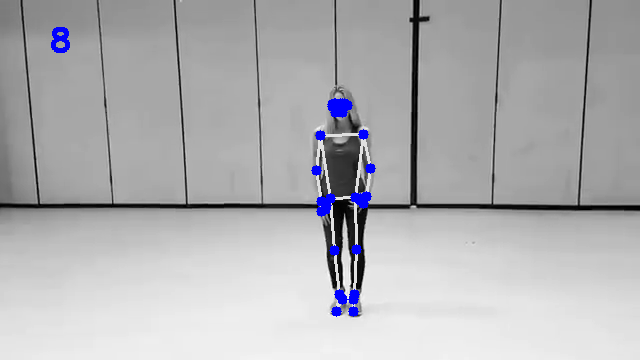

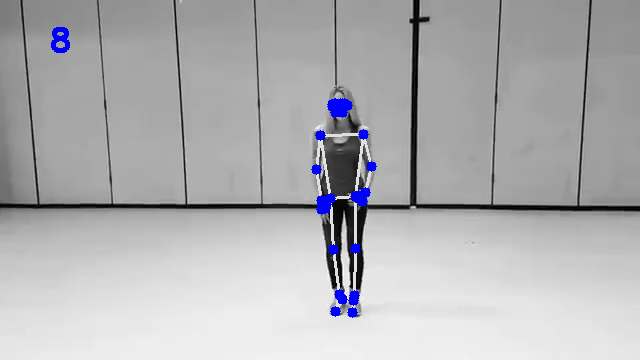

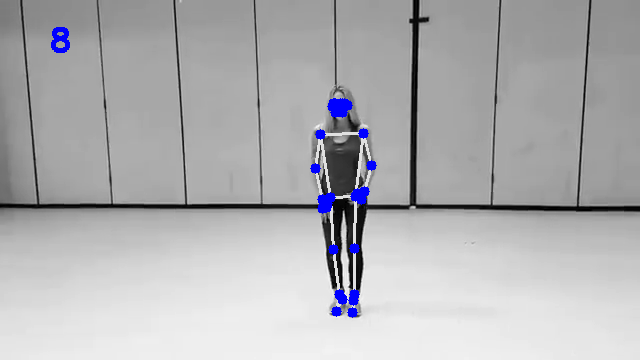

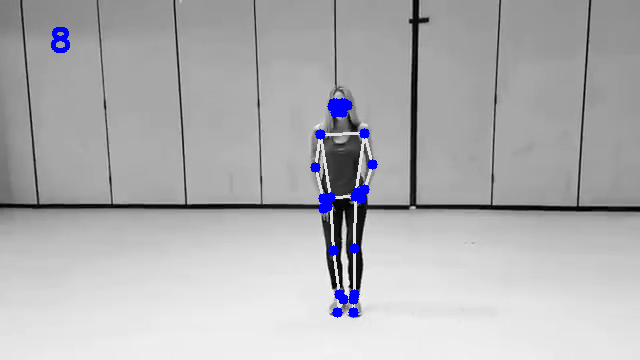

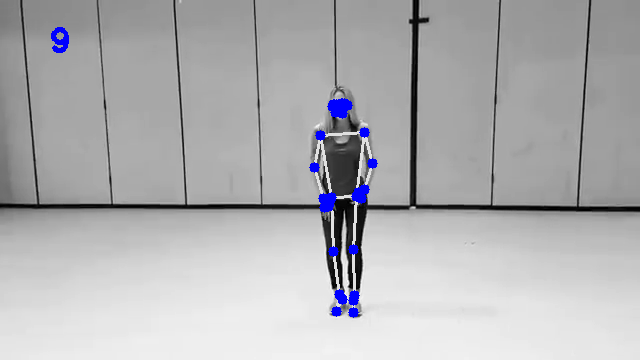

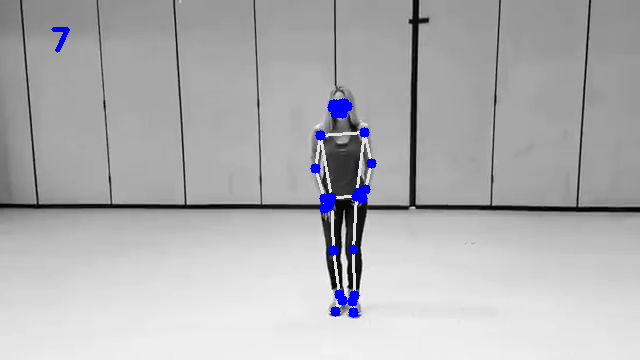

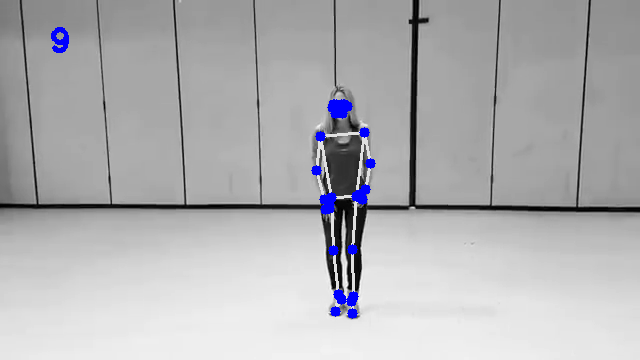

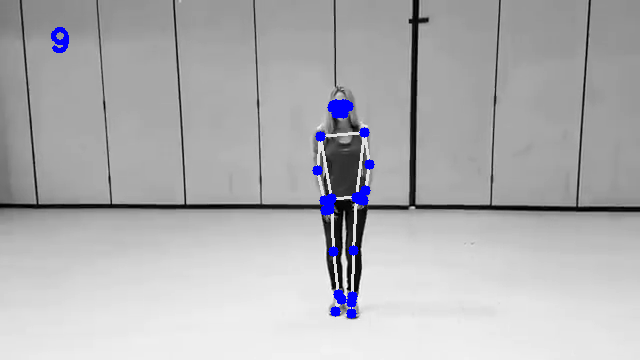

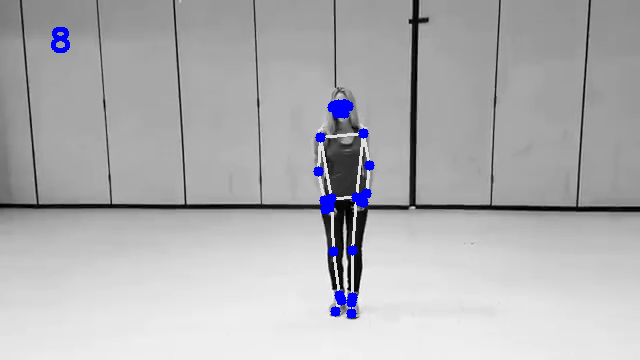

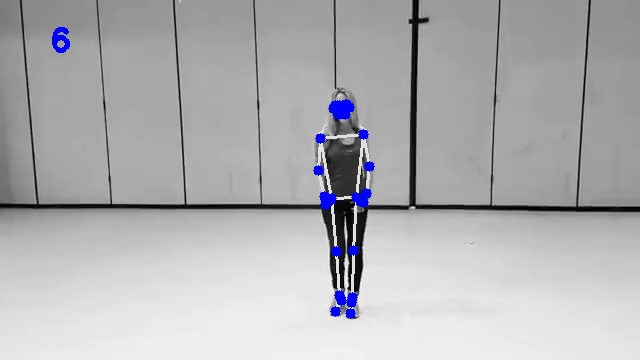

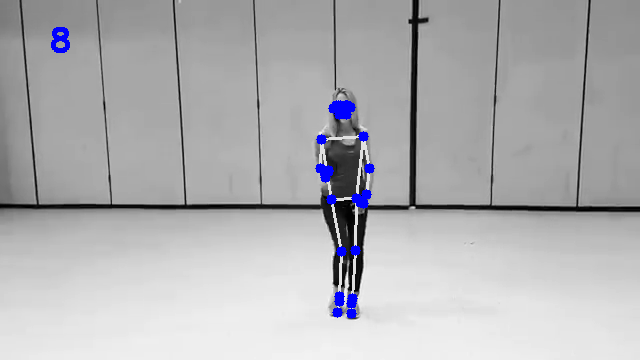

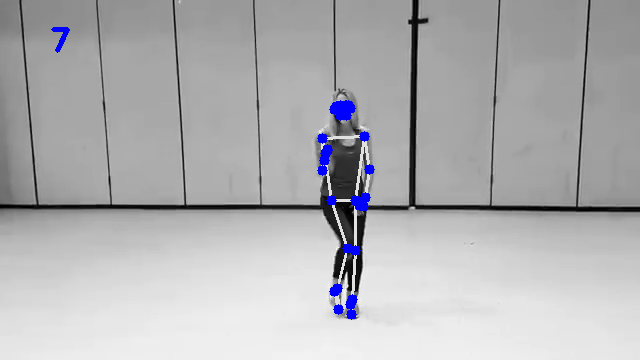

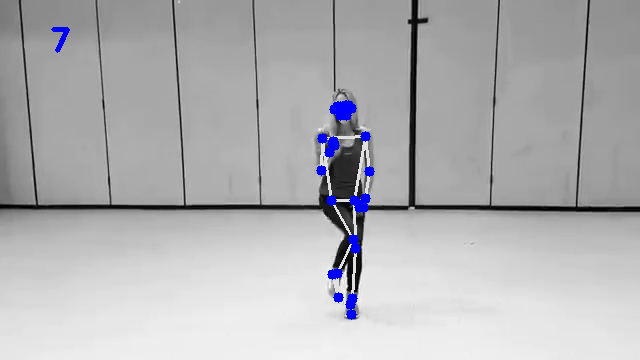

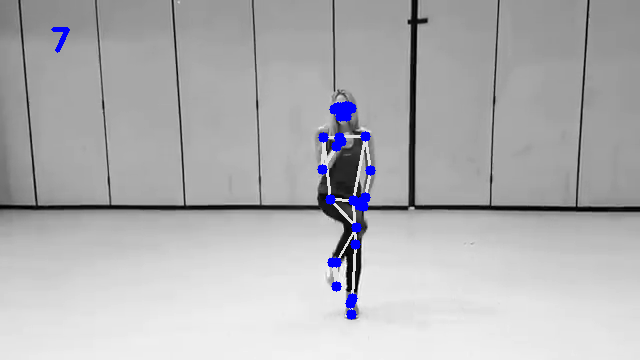

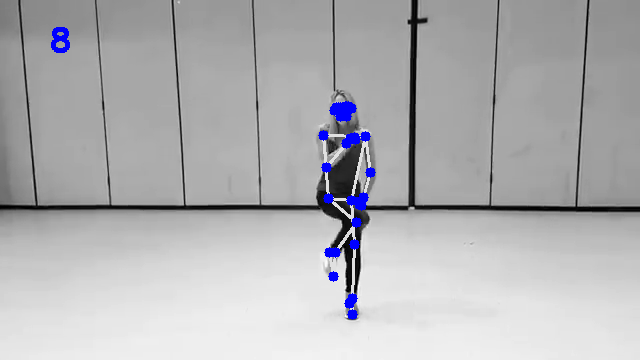

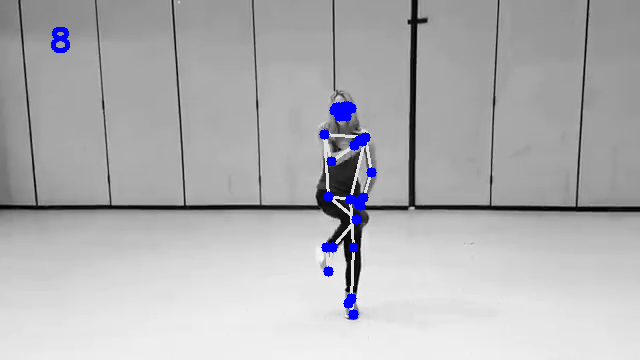

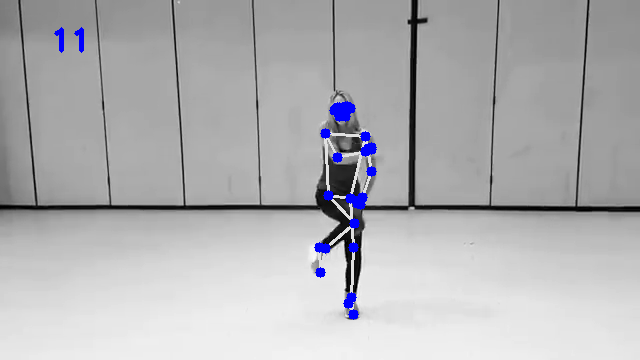

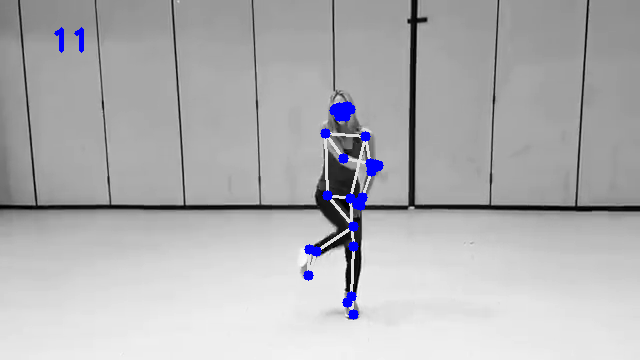

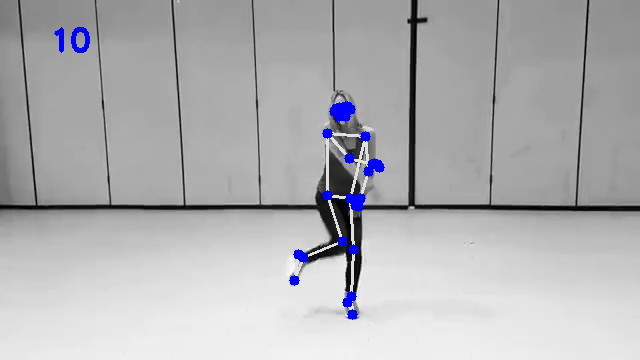

In [20]:
for _ in range(25):
    success, img = cap.read()
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = pose.process(imgRGB)
    # print(results.pose_landmarks)
    if results.pose_landmarks:
        mpDraw.draw_landmarks(img, results.pose_landmarks, mpPose.POSE_CONNECTIONS)
        for id, lm in enumerate(results.pose_landmarks.landmark):
            h, w,c = img.shape
            # print(id, lm)
            cx, cy = int(lm.x*w), int(lm.y*h)
            cv2.circle(img, (cx, cy), 5, (255,0,0), cv2.FILLED)


    cTime = time.time()
    fps = 1/(cTime-pTime)
    pTime = cTime

    cv2.putText(img, str(int(fps)), (50,50), cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0), 3)
    cv2_imshow(img)
    cv2.waitKey(1)

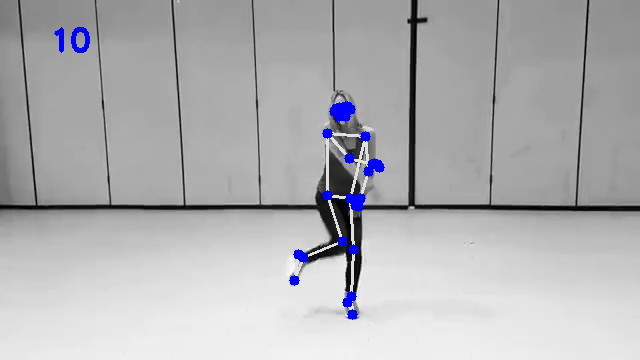

In [21]:
cv2_imshow(img)

In [23]:
import cv2
import mediapipe as mp
import time

# Initialize MediaPipe Pose and Drawing modules
mpPose = mp.solutions.pose
mpDraw = mp.solutions.drawing_utils
pose = mpPose.Pose()

# Open a video capture object (cap) - replace 'your_video_path' with your video file or camera index
cap = cv2.VideoCapture('dance.mp4')

# Get video frame dimensions
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# Define the codec and create a VideoWriter object to save the video
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.mp4', fourcc, 30, (frame_width, frame_height))

pTime = 0

while True:
    success, img = cap.read()
    if not success:
        break

    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = pose.process(imgRGB)

    if results.pose_landmarks:
        mpDraw.draw_landmarks(img, results.pose_landmarks, mpPose.POSE_CONNECTIONS)
        for id, lm in enumerate(results.pose_landmarks.landmark):
            h, w, c = img.shape
            cx, cy = int(lm.x * w), int(lm.y * h)
            cv2.circle(img, (cx, cy), 5, (255, 0, 0), cv2.FILLED)

    cTime = time.time()
    fps = 1 / (cTime - pTime)
    pTime = cTime
    cv2.putText(img, str(int(fps)), (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)

    # Write the frame to the video file
    out.write(img)

    # cv2.imshow('Video', img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and writer objects
cap.release()
out.release()

# Close all OpenCV windows
cv2.destroyAllWindows()